# **Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import manifold, datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE


import os
os.chdir('/content/gdrive/MyDrive/group10')

# Load datasets
data = pd.read_csv('hfus.csv')
data1 = pd.read_csv('pKa.csv')

gc = data.iloc[:,2:] # gc is hfus
gc1 = data1.iloc[:, 2:] # gc1 is pka

data_hfus = pd.DataFrame(data)
gc_df = pd.DataFrame(gc)
gc_df['Hfus'] = data_hfus['Hfus']

data_pKa = pd.DataFrame(data1)
gc1_df = pd.DataFrame(gc1)
gc1_df['pKa'] = data_pKa['pka']


Mounted at /content/gdrive


In [ ]:
# tSNE definition 

def tsneresult (dataset, perplexity):
  tsne = TSNE(n_components = 2, perplexity = perplexity, learning_rate = 'auto', init = 'random') #The result changed everytime???
  tsne_result = tsne.fit_transform(dataset)# all the descriptors? 
  print(tsne_result.shape)
  return tsne_result

def tsneresult_3d (dataset, perplexity):
  tsne = TSNE(n_components = 3, perplexity = perplexity, learning_rate = 'auto', init = 'random') #The result changed everytime???
  tsne_result = tsne.fit_transform(dataset)# all the descriptors? 
  print(tsne_result.shape)
  return tsne_result


def tsnegraph (dataset, tsne_result, perplexity, prop):
  dataset['tsne_D1'] = tsne_result[:, 0]
  dataset['tsne_D2'] = tsne_result[:, 1]
  plt.figure(figsize = (8, 5)) #16, 10
  sns.scatterplot(x = 'tsne_D1', y = 'tsne_D2', hue = prop, palette = sns.color_palette("coolwarm", as_cmap=True), data = dataset, alpha = 0.3) # how to color code
  plt.title('perplexity = {}'.format(perplexity))

def tsnegraph_3d (dataset, tsne_result, perplexity, prop):
  dataset['tsne_D1'] = tsne_result[:, 0]
  dataset['tsne_D2'] = tsne_result[:, 1]
  dataset['tsne_D3'] = tsne_result[:, 2]
  plot = px.scatter_3d(x='tsne_D1',y='tsne_D2',z='tsne_D3',data_frame = dataset, color = prop, opacity=0.5, title = prop)
  plot.show()

# **2D Visualization**

In [ ]:
#2D tSNE

gc = data.iloc[:,2:] # gc is hfus
gc1 = data1.iloc[:, 2:] # gc1 is pka

gc_result_5 = tsneresult(gc, 5)
gc_result_10 = tsneresult(gc, 10)
gc_result_50 = tsneresult(gc, 50)
gc_result_100 = tsneresult(gc, 100)

gc1_result_5 = tsneresult(gc1, 5)
gc1_result_50 = tsneresult(gc1, 50)
gc1_result_100 = tsneresult(gc1, 100)
gc1_result_200 = tsneresult(gc1, 200)

(749, 2)
(749, 2)
(749, 2)
(749, 2)
(1633, 2)
(1633, 2)
(1633, 2)
(1633, 2)


In [ ]:
# when hgiher dimension of the datasets, higher perplexity is needed. 

# If want to ignore outliers
# gc_df = gc_df[gc_df['Hfus']<=75] # take only hfus that are less than 75
# gc1_df = gc1_df[gc1_df['Pka']<=75]
# gc_result_100 = tsneresult(gc_df, 100)
# tsnegraph(gc_df, gc_result_100, 100, prop = 'Hfus')

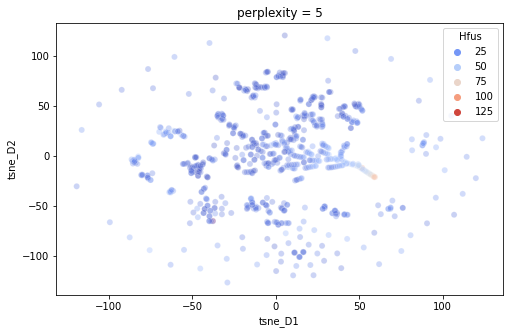

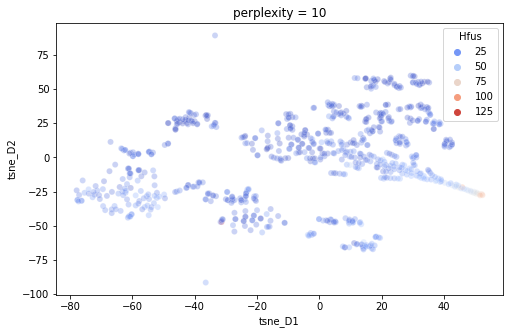

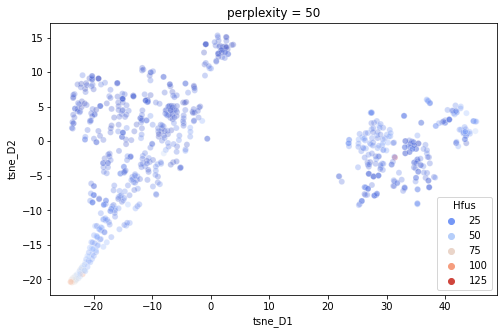

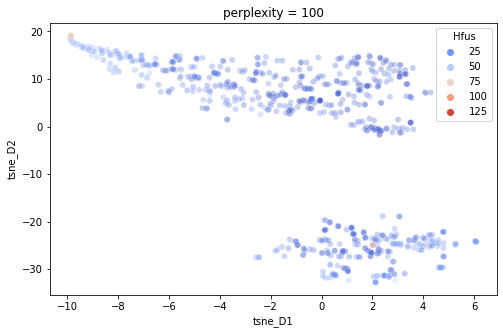

In [ ]:
# 2D Visualization of hfus tSNE

tsnegraph(gc_df, gc_result_5, 5, prop = 'Hfus') # What does perplexity does
tsnegraph(gc_df, gc_result_10, 10, prop = 'Hfus')
tsnegraph(gc_df, gc_result_50, 50, prop = 'Hfus')
tsnegraph(gc_df, gc_result_100, 100, prop = 'Hfus')

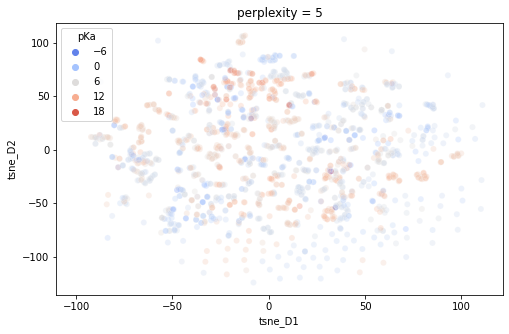

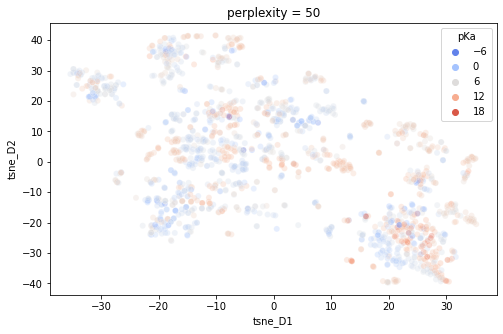

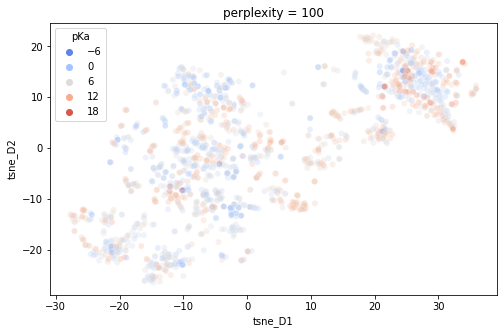

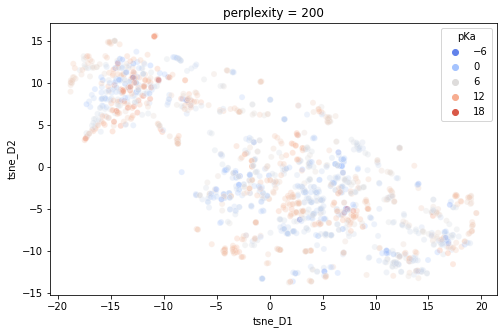

In [ ]:
# 2D Visualization of pka tSNE

tsnegraph(gc1_df, gc1_result_5, 5, prop = 'pKa') # What does perplexity does
tsnegraph(gc1_df, gc1_result_50, 50, prop = 'pKa')
tsnegraph(gc1_df, gc1_result_100, 100, prop = 'pKa')
tsnegraph(gc1_df, gc1_result_200, 200, prop = 'pKa')

In [ ]:
# no trends can be seen from the pka plot, but some trends can be seen from the hfus plot. 
# thus, 3D plot was generated

# **3D Visualization**

In [ ]:
# 3D hfus and pka tSNE 
gc_3d_result = tsneresult_3d(gc, 40)
gc1_3d_result = tsneresult_3d(gc1, 40)

(749, 3)
(1633, 3)


In [ ]:
#3D Visualization of hfus and pka tSNE
tsnegraph_3d(gc_df, gc_3d_result, 40, prop = 'Hfus')
tsnegraph_3d(gc1_df, gc1_3d_result, 40, prop = 'pKa')

In [ ]:
# trends can be seen in both plots
# the data points presented a curved sheet, where positive pKa molecules are on the inside and negative pKa molecules are on the outer side. 
# Group contributors can capture similarities in chemical structures with regard to pKa values. 
# The heat of fusion graph also shows a trend of lower heat of fusion is more toward one direction (up left in this view)
# Group contributors could capture some similarities of chemical structure that affect the heat of fusion.